In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import random

In [3]:
#Parameters to tune
delta = 0.99
gamma = 1
lamda = 2
num = 10000 #Number of standard normal numbers to generate

In [5]:
#Always set so random numbers generated is always the same
np.random.seed(42)

In [25]:
e = np.random.normal(0, 1, num)
e

array([-0.67849473, -0.30549946, -0.59738106, ...,  0.37835397,
        1.71352973, -1.6199198 ])

In [27]:
len(e) #CHECK IF == NUM

10000

In [29]:
g = np.exp(0.02+0.02*e) * 0.7
g

array([0.70451558, 0.70979085, 0.70565942, ..., 0.7195654 , 0.73903917,
       0.6913747 ])

In [31]:
len(g) #CHECK IF == NUM

10000

In [33]:
Rf = np.exp(0.0198) / 0.99
Rf

1.0303003233953707

In [35]:
g*2

array([1.40903115, 1.4195817 , 1.41131884, ..., 1.43913079, 1.47807835,
       1.38274941])

In [37]:
#Utility from financial gain/loss

def utility (R):
    utility_list = []
    for Ri in R:
        if Ri >= Rf:
            utility = Ri - Rf
        else:
            utility = lamda * (Ri - Rf)
        utility_list.append(utility)
    return np.array(utility_list)

In [39]:
#Error term
def error (x , b0):
    error_term = (delta * b0 * np.mean(utility (x*g))) + (delta * x) - 1 
    return error_term

In [ ]:
b0 = np.arange(0, 10.1, 0.1)
x_list = []

def x0_solution_iterative(x_neg, x_pos, b0):
    while True:
        x = 0.5 * (x_neg + x_pos)
        if np.abs(error(x, b0)) < 10**(-5):  # Stopping criterion
            x_list.append(x)
            print('b0 =', b0, 'x0 =', x)
            break
        elif error(x, b0) < 0:
            x_neg = x
        else:
            x_pos = x
    return x

# Example usage
for b in b0:
    x0_solution_iterative(1, 1.1, b)


b0 = 0.0 x0 = 1.010107421875
b0 = 0.1 x0 = 1.0641113281249999


In [ ]:
x_list = np.array(x_list)
p_over_d = 1/(x_list-1)
p_over_d_df = pd.DataFrame({'b0': b0, 'P/D': p_over_d})
p_over_d_df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


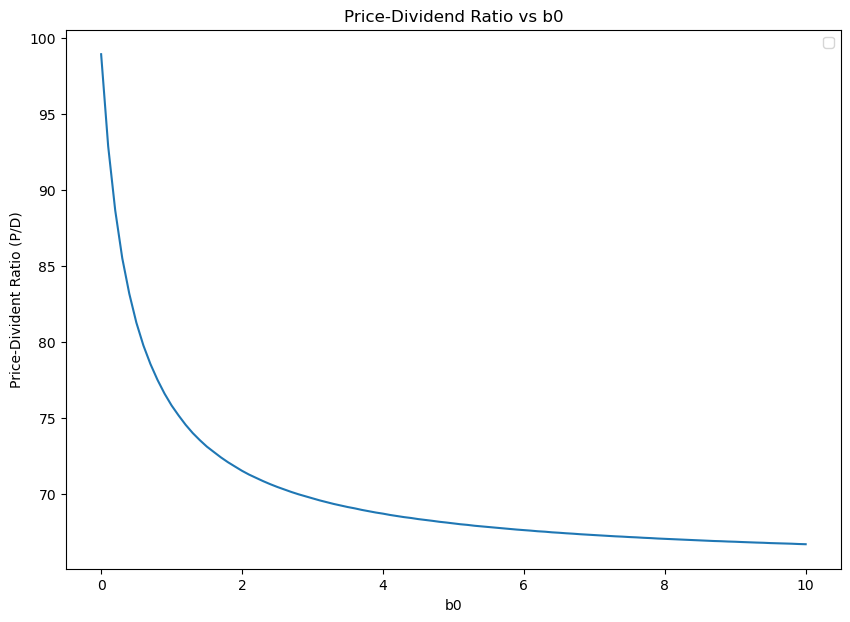

In [14]:
plt.figure(figsize = [10,7])
plt.plot(b0, p_over_d)
plt.xlabel('b0')
plt.ylabel('Price-Divident Ratio (P/D)')
plt.title('Price-Dividend Ratio vs b0')
plt.legend()

In [15]:
x_list = np.array(x_list)
expected_market_return = x_list * np.exp(0.0202)
equity_premium = expected_market_return - Rf
equity_premium

array([0.00041875, 0.00109138, 0.00161453, 0.00203804, 0.00237436,
       0.00266085, 0.00289751, 0.00309681, 0.0032712 , 0.0034269 ,
       0.00356392, 0.00368225, 0.00379435, 0.003894  , 0.0039812 ,
       0.00406216, 0.00413067, 0.00419918, 0.00426146, 0.00431751,
       0.00437356, 0.00442339, 0.00446698, 0.00451058, 0.00455106,
       0.00458843, 0.00462269, 0.00465694, 0.00468808, 0.00471611,
       0.00474413, 0.00477216, 0.00479707, 0.00482198, 0.00484378,
       0.00486558, 0.00488426, 0.00490606, 0.00492475, 0.00494343,
       0.004959  , 0.00497769, 0.00499326, 0.00500883, 0.00502128,
       0.00503685, 0.00504931, 0.00506176, 0.00507578, 0.00508668,
       0.00509913, 0.00511159, 0.00512093, 0.00513339, 0.00514273,
       0.00515207, 0.00516141, 0.00517076, 0.0051801 , 0.00518944,
       0.00519722, 0.00520501, 0.00521435, 0.00522058, 0.00522992,
       0.00523615, 0.00524393, 0.00525016, 0.00525795, 0.00526418,
       0.0052704 , 0.00527663, 0.00528286, 0.00528909, 0.00529

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


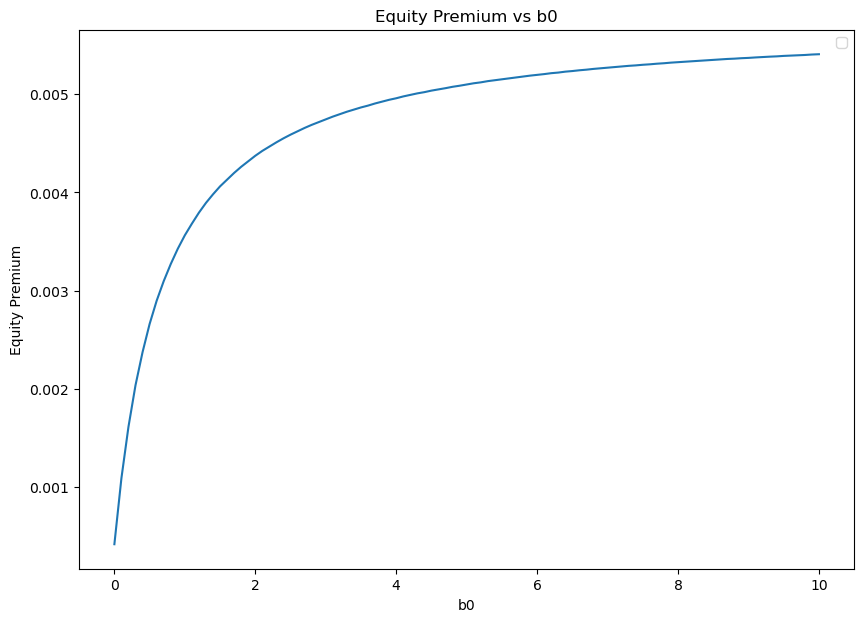

In [16]:
plt.figure(figsize = [10,7])
plt.plot(b0, equity_premium)
plt.xlabel('b0')
plt.ylabel('Equity Premium')
plt.title('Equity Premium vs b0')
plt.legend()